In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [5]:
Xtest = np.load("C:/Users/User/ML/Video_Forgery_Detection/video_tampering_dataset/Xtest.npy")
Ytest = np.load("C:/Users/User/ML/Video_Forgery_Detection/video_tampering_dataset/Ytest.npy")

In [6]:
print(Xtest.shape)
print(Ytest.shape)

(1000, 240, 320, 3)
(1000,)


In [7]:
model = load_model("C:/Users/User/ML/Video_Forgery_Detection/ResNet50_Model/forgery_model.hdf5")

In [8]:
outputs = model.predict(Xtest)

In [9]:
outputs = outputs.reshape((-1))
print(outputs.shape)

(1000,)


In [11]:
for i in range(outputs.shape[0]):
    if outputs[i] > 0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0

In [12]:
print(outputs)

[0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.

In [13]:
positiveCount = 0
for i in range(Xtest.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.762


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [15]:
print(classification_report(outputs,Ytest))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       862
         1.0       0.30      0.54      0.38       138

    accuracy                           0.76      1000
   macro avg       0.61      0.67      0.62      1000
weighted avg       0.83      0.76      0.79      1000



In [16]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[688 174]
 [ 64  74]]


Confusion matrix, without normalization
[[688 174]
 [ 64  74]]


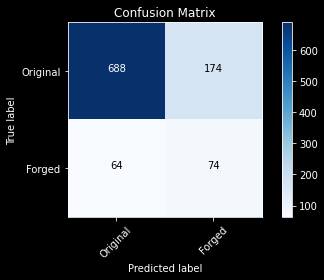

In [17]:
plt.style.use('dark_background')
plot_confusion_matrix(cnf_matrix,classes = ["Original","Forged"],title="Confusion Matrix")